#Read

In [16]:
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/Fintech_Proj/processed_timestamp_data_Classification.csv'
df = pd.read_csv(file_path)
df.head

,Name,Price,Side,Volume,Order_Executed,Target,day,month,year,hour,minute,second,day_of_week
0,84765908,6400000.0,1,1,0,0,3,3,2024,7,45,14,1
1,84765353,26600000.0,0,1,0,0,3,3,2024,7,45,14,1
2,84765395,10000.0,0,1,0,0,3,3,2024,7,45,14,1
3,84842517,16600000.0,0,1,0,0,3,3,2024,7,45,14,1
4,84805688,10000.0,0,1,0,0,3,3,2024,7,45,14,1


#Analytics and Pre-Process

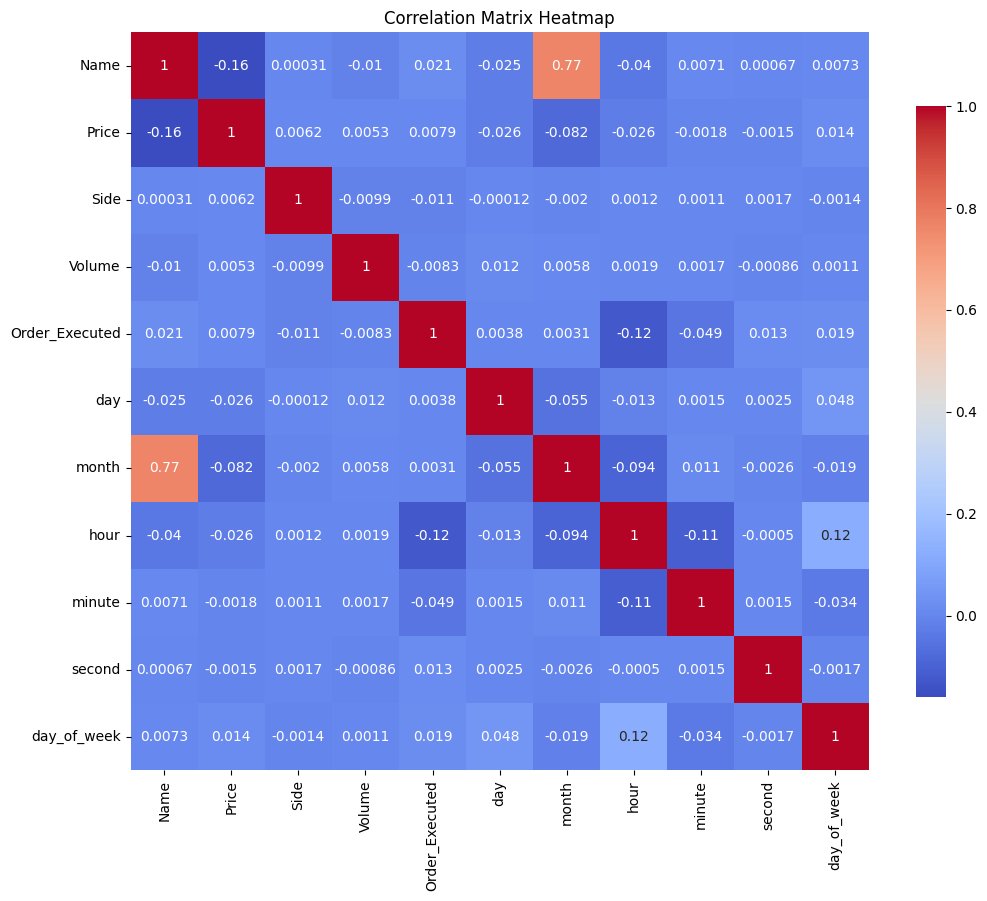

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = df.drop(columns=['Target','year']).corr()

# Plotting the heatmap for the correlation matrix with a larger figure size
plt.figure(figsize=(11, 9))  # Make the figure larger as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True,
            cbar_kws={"shrink": 0.8}, xticklabels=1, yticklabels=1)  # Control label density and stretch
plt.title("Correlation Matrix Heatmap")
plt.tight_layout()  # Adjust layout to fill space
plt.show()

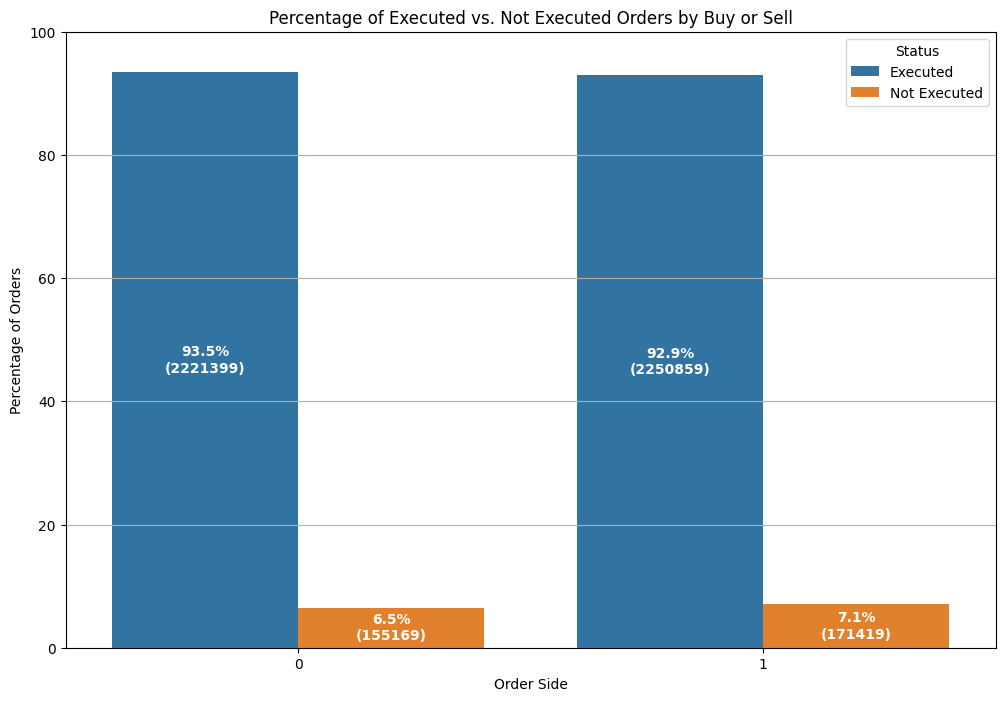

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a 'Status' column to represent executed and non-executed orders
df['Status'] = df['Order_Executed'].apply(lambda x: 'Executed' if x == 1 else 'Not Executed')

# Group by 'Side' and 'Status' and calculate counts
side_status_counts = df.groupby(['Side', 'Status']).size().unstack().fillna(0)

# Calculate percentage within each side (Buy or Sell)
side_status_percent = side_status_counts.div(side_status_counts.sum(axis=1), axis=0) * 100

# Reset index for plotting
side_status_percent = side_status_percent.reset_index().melt(id_vars='Side', var_name='Status', value_name='Percentage')
side_status_counts = side_status_counts.reset_index().melt(id_vars='Side', var_name='Status', value_name='Count')

# Merge counts and percentages for annotation and reset the index
side_status_data = pd.merge(side_status_percent, side_status_counts, on=['Side', 'Status']).reset_index(drop=True)

# Plot
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x='Side', y='Percentage', hue='Status', data=side_status_data, palette=['#1f77b4', '#ff7f0e'])

# Annotate each bar with percentage and count
for i, bar in enumerate(bar_plot.patches):
    try:
      # Get the height (percentage) of each bar and corresponding count
      height = bar.get_height()
      count = side_status_data.loc[i, 'Count']  # Access count using .loc

      # Display percentage and count inside each bar
      bar_plot.text(
          bar.get_x() + bar.get_width() / 2,
          height / 2,  # Position text in the middle of the bar
          f'{height:.1f}%\n({int(count)})',
          ha='center',
          va='center',
          color='white',
          fontsize=10,
          fontweight='bold'
      )
    except:
      continue

plt.title('Percentage of Executed vs. Not Executed Orders by Buy or Sell')
plt.xlabel('Order Side')
plt.ylabel('Percentage of Orders')
plt.ylim(0, 100)  # Set y-axis to 100% max
plt.legend(title='Status')
plt.grid(axis='y')

plt.show()


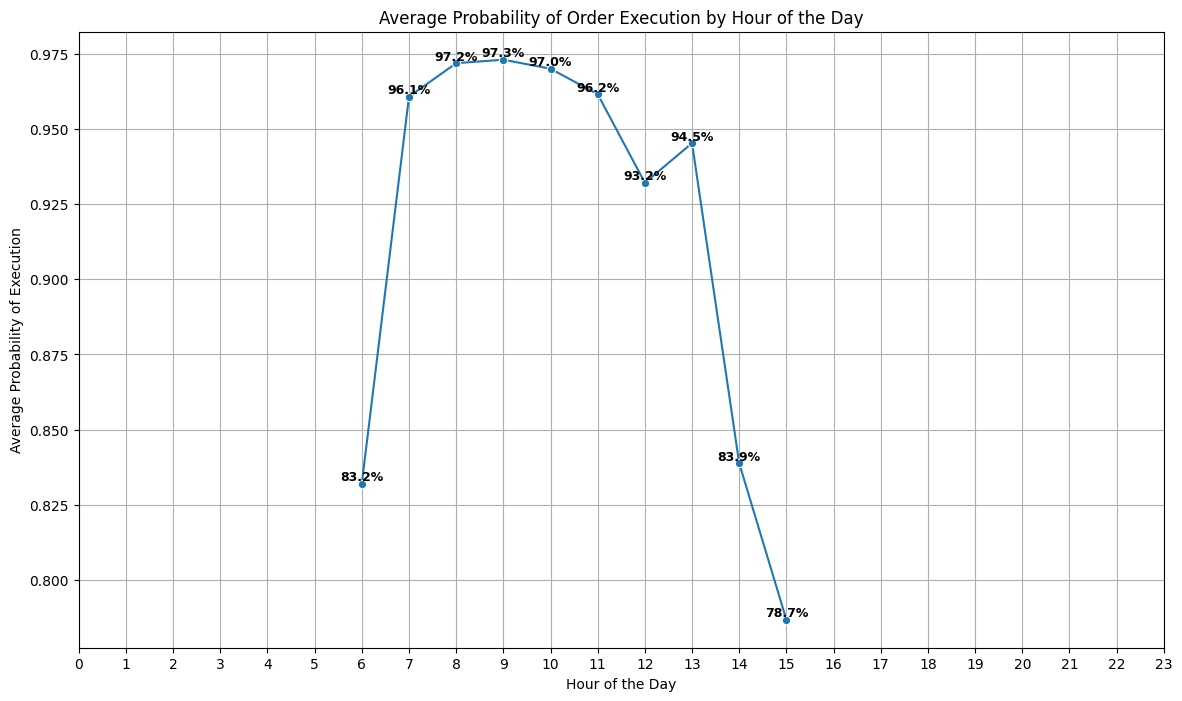

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Group by hour and calculate mean probability of execution
hourly_data = df.groupby('hour')['Order_Executed'].mean().reset_index()

plt.figure(figsize=(14, 8))
line_plot = sns.lineplot(x='hour', y='Order_Executed', data=hourly_data, marker='o')
plt.title('Average Probability of Order Execution by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Probability of Execution')
plt.xticks(range(0, 24))
plt.grid(True)

# Annotate each point with the specific percentage
for i in range(len(hourly_data)):
    plt.text(
        x=hourly_data['hour'][i],
        y=hourly_data['Order_Executed'][i],
        s=f"{hourly_data['Order_Executed'][i] * 100:.1f}%",  # Convert to percentage
        ha='center',
        va='bottom',
        fontsize=9,
        fontweight='bold',
        color='black'
    )

plt.show()


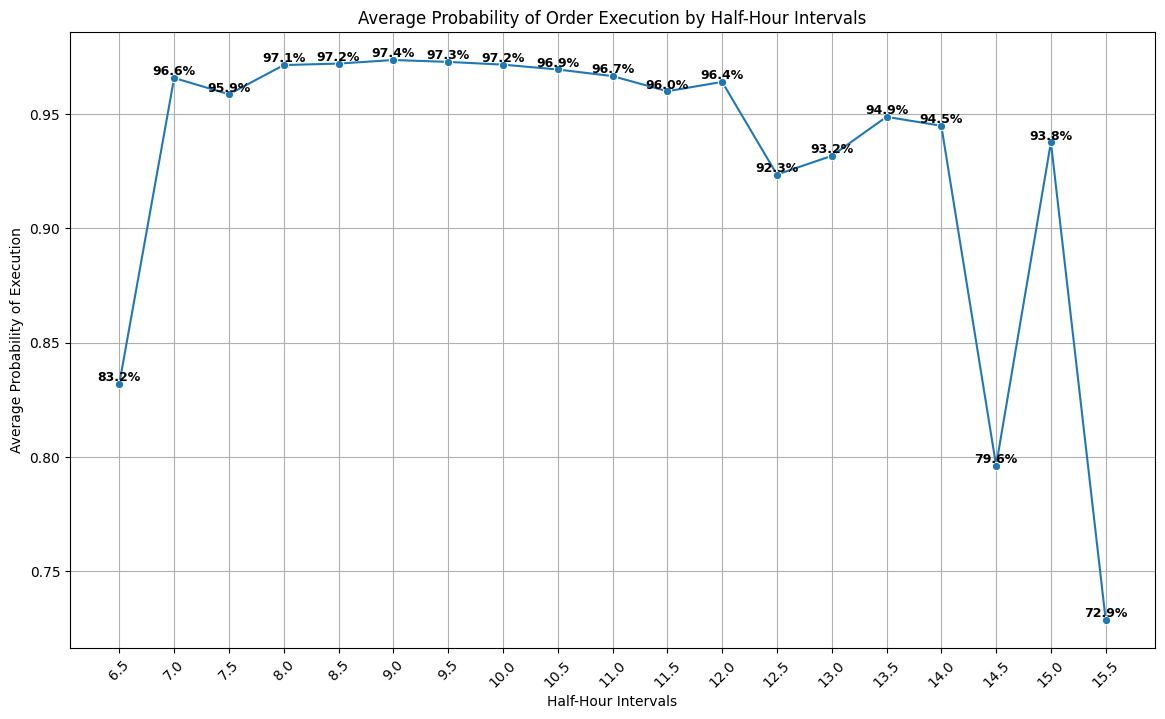

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a new column 'Half_Hour' based on 'Hour' and 'Minute'
df['Half_Hour'] = df['hour'] + (df['minute'] >= 30) * 0.5

# Group by 'Half_Hour' and calculate the mean probability of execution
half_hourly_data = df.groupby('Half_Hour')['Order_Executed'].mean().reset_index()

# Plot
plt.figure(figsize=(14, 8))
line_plot = sns.lineplot(x='Half_Hour', y='Order_Executed', data=half_hourly_data, marker='o')
plt.title('Average Probability of Order Execution by Half-Hour Intervals')
plt.xlabel('Half-Hour Intervals')
plt.ylabel('Average Probability of Execution')
plt.xticks(half_hourly_data['Half_Hour'], rotation=45)
plt.grid(True)

# Annotate each point with the specific percentage
for i in range(len(half_hourly_data)):
    plt.text(
        x=half_hourly_data['Half_Hour'][i],
        y=half_hourly_data['Order_Executed'][i],
        s=f"{half_hourly_data['Order_Executed'][i] * 100:.1f}%",  # Convert to percentage
        ha='center',
        va='bottom',
        fontsize=9,
        fontweight='bold',
        color='black'
    )

plt.show()


#DL for Classification



In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Training LSTM model...
Epoch 1/5
7499/7499 ━━━━━━━━━━━━━━━━━━━━ 102s 13ms/step - accuracy: 0.9107 - loss: 0.2611 - val_accuracy: 0.9402 - val_loss: 0.1960
Epoch 2/5
7499/7499 ━━━━━━━━━━━━━━━━━━━━ 149s 14ms/step - accuracy: 0.9392 - loss: 0.1973 - val_accuracy: 0.9428 - val_loss: 0.1865
Epoch 3/5
7499/7499 ━━━━━━━━━━━━━━━━━━━━ 104s 14ms/step - accuracy: 0.9416 - loss: 0.1881 - val_accuracy: 0.9439 - val_loss: 0.1819
Epoch 4/5
7499/7499 ━━━━━━━━━━━━━━━━━━━━ 98s 13ms/step - accuracy: 0.9427 - loss: 0.1844 - val_accuracy: 0.9438 - val_loss: 0.1808
Epoch 5/5
7499/7499 ━━━━━━━━━━━━━━━━━━━━ 107s 14ms/step - accuracy: 0.9432 - loss: 0.1823 - val_accuracy: 0.9435 - val_loss: 0.1782
29993/29993 ━━━━━━━━━━━━━━━━━━━━ 60s 2ms/step - accuracy: 0.9434 - loss: 0.1783
LSTM Model - Test Loss: 0.1781974881887436, Test Accuracy: 0.9435114860534668
29993/29993 ━━━━━━━━━━━━━━━━━━━━ 50s 2ms/step
29993/29993 ━━━━━━━━━━━━━━━━━━━━ 51s 2ms/step
LSTM Classification Report:
               precision    recall  f1-

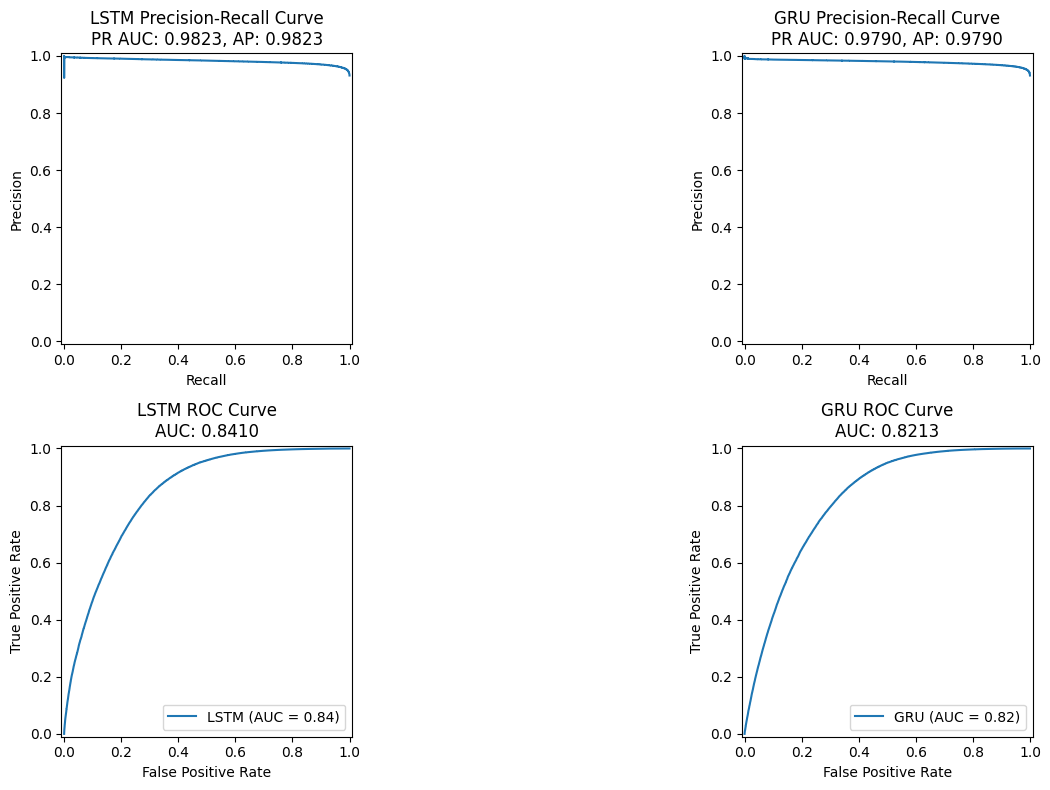

In [8]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout, BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score
import os
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE
import numpy as np
from tensorflow.keras.optimizers import Adam


# Path to the file in your Google Drive
file_path = '/content/drive/MyDrive/Fintech_Proj/processed_timestamp_data_Classification.csv'
data = pd.read_csv(file_path)
target_column = "Order_Executed"  # Target column name

# Separate features and target
X = data.drop(columns=[target_column]).values
y = data[target_column].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape data for LSTM/GRU compatibility (samples, timesteps=1, features)
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import (
    classification_report, precision_recall_curve, roc_curve, auc,
    average_precision_score, RocCurveDisplay, PrecisionRecallDisplay
)
import matplotlib.pyplot as plt

# Define a dictionary for models
models = {
    'LSTM': Sequential([
        LSTM(64, activation='tanh', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
        BatchNormalization(),
        Dropout(0.2),
        LSTM(32, activation='tanh'),
        BatchNormalization(),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ]),

    'GRU': Sequential([
        GRU(64, activation='tanh', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
        BatchNormalization(),
        Dropout(0.3),
        GRU(32, activation='tanh'),
        BatchNormalization(),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])
}

# Compile and train each model in the loop
history_dict = {}  # To store training history for both models
y_preds = {}  # To store predictions for each model
y_probs = {}  # To store probability predictions for each model

# Loop through models
for name, model in models.items():
    # Compile model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    print(f"\nTraining {name} model...")

    # Train the model
    history_dict[name] = model.fit(X_train, y_train, epochs=5, batch_size=512, validation_data=(X_test, y_test), verbose=1)

    # Evaluate the model
    loss, accuracy = model.evaluate(X_test, y_test)
    print(f'{name} Model - Test Loss: {loss}, Test Accuracy: {accuracy}')

    # Store predictions
    y_preds[name] = model.predict(X_test)
    y_probs[name] = model.predict(X_test).flatten()

    # Classification Report
    print(f"{name} Classification Report:\n", classification_report(y_test, (y_probs[name] > 0.5)))

# Plot Precision-Recall and ROC Curves
fig, axs = plt.subplots(2, len(models), figsize=(16, 8))

for i, (name, _) in enumerate(models.items()):
    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_test, y_probs[name])
    pr_auc = auc(recall, precision)  # Integral for Precision-Recall Curve
    avg_precision = average_precision_score(y_test, y_probs[name])  # Average Precision Score
    pr_display = PrecisionRecallDisplay(precision=precision, recall=recall)
    pr_display.plot(ax=axs[0, i])
    axs[0, i].set_title(f'{name} Precision-Recall Curve\nPR AUC: {pr_auc:.4f}, AP: {avg_precision:.4f}')

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_probs[name])
    roc_auc = auc(fpr, tpr)  # Integral for ROC Curve
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=name)
    roc_display.plot(ax=axs[1, i])
    axs[1, i].set_title(f'{name} ROC Curve\nAUC: {roc_auc:.4f}')

plt.tight_layout()
plt.show()



#ML for Classification

In [2]:
!pip install catboost
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 23.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 9.6 MB/s eta 0:00:00


In [6]:
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Training and evaluating XGBoost...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:55:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Training and evaluating LightGBM...
[LightGBM] [Info] Number of positive: 3577806, number of negative: 261270
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.231110 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 831
[LightGBM] [Info] Number of data points in the train set: 3839076, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.931945 -> initscore=2.616951
[LightGBM] [Info] Start training from score 2.616951
Training and evaluating CatBoost...


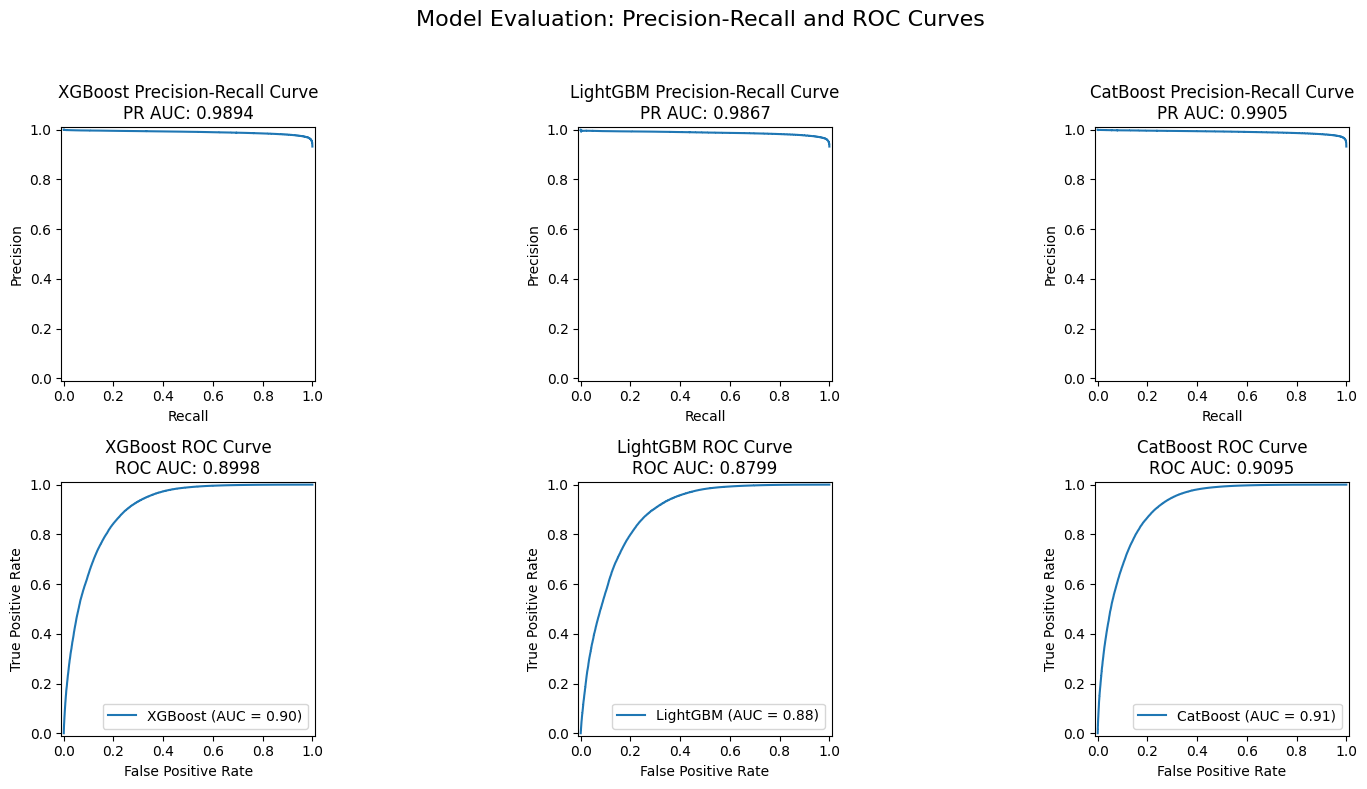

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, classification_report, roc_curve, auc,
    precision_recall_curve, RocCurveDisplay, PrecisionRecallDisplay
)
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Load your dataset
file_path = '/content/drive/MyDrive/Fintech_Proj/processed_timestamp_data_Classification.csv'
data = pd.read_csv(file_path)
target_column = 'Order_Executed'  # Replace with the actual target column

# Prepare the features (X) and target (y)
X = data.drop(columns=[target_column])
y = data[target_column]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Models to compare
models = {
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "LightGBM": LGBMClassifier(random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42)
}

from sklearn.metrics import auc, precision_recall_curve, roc_curve, RocCurveDisplay, PrecisionRecallDisplay
import matplotlib.pyplot as plt

# Plot Precision-Recall Curve and calculate PR AUC
plt.figure(figsize=(16, 8))
plt.suptitle('Model Evaluation: Precision-Recall and ROC Curves', fontsize=16)

for i, (name, model) in enumerate(models.items()):
    print(f"Training and evaluating {name}...")

    # Train the model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # Probability for positive class

    # Plot Precision-Recall Curve
    plt.subplot(2, len(models), i + 1)
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    pr_auc = auc(recall, precision)  # Calculate PR AUC
    pr_display = PrecisionRecallDisplay(precision=precision, recall=recall)
    pr_display.plot(ax=plt.gca())
    plt.title(f'{name} Precision-Recall Curve\nPR AUC: {pr_auc:.4f}')  # Display PR AUC on the plot

    # Plot ROC Curve
    plt.subplot(2, len(models), i + 1 + len(models))
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)  # Calculate ROC AUC
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=name)
    roc_display.plot(ax=plt.gca())
    plt.title(f'{name} ROC Curve\nROC AUC: {roc_auc:.4f}')  # Display ROC AUC on the plot

# Show plots
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


#DL for Forecasting


Training LSTM model...
Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


697/697 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.5549 - val_loss: 0.0080
Epoch 2/5
697/697 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0165 - val_loss: 0.0090
Epoch 3/5
697/697 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0148 - val_loss: 0.0127
Epoch 4/5
697/697 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0139 - val_loss: 0.0043
Epoch 5/5
697/697 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0104 - val_loss: 0.0036


1/5 ━━━━━━━━━━━━━━━━━━━━ 1s 360ms/step

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step
LSTM Model - MSE: 0.0036, MAE: 0.0351, R2: 0.7237

Training GRU model...
Epoch 1/5
697/697 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 0.9681 - val_loss: 0.1258
Epoch 2/5
697/697 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0789 - val_loss: 0.0339
Epoch 3/5
697/697 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0294 - val_loss: 0.0147
Epoch 4/5
697/697 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0227 - val_loss: 0.0111
Epoch 5/5
697/697 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0151 - val_loss: 0.0089
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step
GRU Model - MSE: 0.0089, MAE: 0.0567, R2: 0.3161


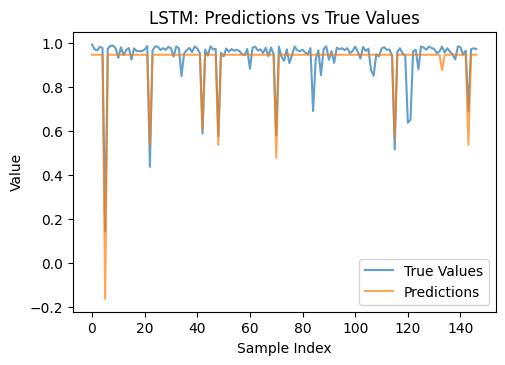

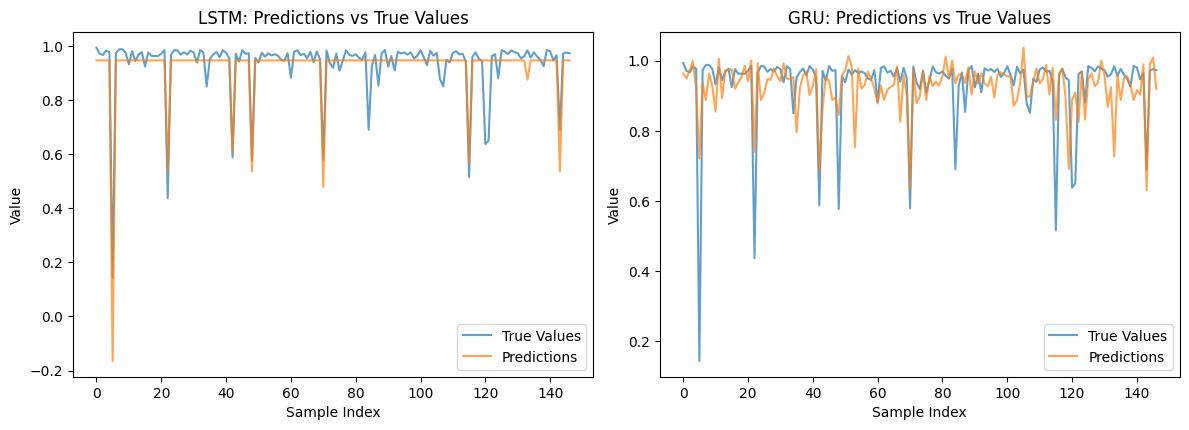

In [16]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout, BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/drive/MyDrive/Fintech_Proj/processed_timestamp_data_Prediction.csv'
data = pd.read_csv(file_path)
target_column = "Avg_Order_Executed"  # Replace with your target column for regression

# Separate features and target
X = data.drop(columns=[target_column]).values
y = data[target_column].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

# Normalize the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape data for LSTM/GRU compatibility (samples, timesteps=1, features)
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Define LSTM and GRU models
models = {
    'LSTM': Sequential([
        LSTM(32, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
        BatchNormalization(),
        Dropout(0.1),
        LSTM(4, activation='relu'),
        BatchNormalization(),
        Dropout(0.1),
        Dense(1)  # Regression task
    ]),
    'GRU': Sequential([
        GRU(32, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
        BatchNormalization(),
        Dropout(0.1),
        GRU(4, activation='relu'),
        BatchNormalization(),
        Dropout(0.1),
        Dense(1)  # Regression task
    ])
}

# Train and evaluate models
results = {}
for name, model in models.items():
    # Compile the model
    model.compile(optimizer='adam', loss='mse')  # Use MSE for regression

    print(f"\nTraining {name} model...")

    # Train the model
    history = model.fit(X_train, y_train, epochs=5, batch_size=4, validation_data=(X_test, y_test), verbose=1)

    # Evaluate the model
    y_pred = model.predict(X_test).flatten()
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {'MSE': mse, 'MAE': mae, 'R2': r2, 'Predictions': y_pred}

    print(f"{name} Model - MSE: {mse:.4f}, MAE: {mae:.4f}, R2: {r2:.4f}")

    # Plot Predictions vs True Values for each model
    plt.figure(figsize=(12, 8))  # Create a larger figure to accommodate subplots
    for i, (name, result) in enumerate(results.items()):
        y_pred = result['Predictions']

        # Plot predictions vs true values
        plt.subplot(2, 2, i + 1)
        plt.plot(range(len(y_test)), y_test, label="True Values", alpha=0.7)
        plt.plot(range(len(y_pred)), y_pred, label="Predictions", alpha=0.7)
        plt.title(f'{name}: Predictions vs True Values')
        plt.xlabel('Sample Index')
        plt.ylabel('Value')
        plt.legend()

plt.tight_layout()
plt.show()


#ML for Forecasting

In [1]:
!pip install --upgrade tsfresh
!pip install scipy==1.9.3


  Using cached scipy-1.15.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached scipy-1.15.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (40.6 MB)
  Attempting uninstall: scipy
    Found existing installation: scipy 1.9.3
    Uninstalling scipy-1.9.3:
      Successfully uninstalled scipy-1.9.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.15.1 which is incompatible.
  Using cached scipy-1.9.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (58 kB)
Using cached scipy-1.9.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (33.4 MB)
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.1
    Uninstalling scipy-1.15.1:
      Successfully uninstalled scipy-1.15.1
ERROR: pip's dependency resolver does

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Rolling: 100%|██████████| 2926/2926 [00:09<00:00, 306.20it/s]
Feature Extraction: 0it [00:00, ?it/s]



Training XGBoost...
XGBoost Evaluation Metrics:
  Mean Squared Error (MSE): 0.0005
  Mean Absolute Error (MAE): 0.0135
  R^2 Score: 0.9381
   True Values  Predictions  Day  Month
0     0.967764     0.966759  1.0    7.0
1     0.979092     0.971887  1.0    7.0
2     0.966041     0.971157  1.0    7.0
3     0.947311     0.965469  1.0    7.0
4     0.940524     0.954169  1.0    7.0

Training LightGBM...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000207 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3122
[LightGBM] [Info] Number of data points in the train set: 2340, number of used features: 17
[LightGBM] [Info] Start training from score 0.937657
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


CatBoost Evaluation Metrics:
  Mean Squared Error (MSE): 0.0004
  Mean Absolute Error (MAE): 0.0137
  R^2 Score: 0.9513
   True Values  Predictions  Day  Month
0     0.967764     0.970766  1.0    7.0
1     0.979092     0.974783  1.0    7.0
2     0.966041     0.966098  1.0    7.0
3     0.947311     0.966534  1.0    7.0
4     0.940524     0.957445  1.0    7.0


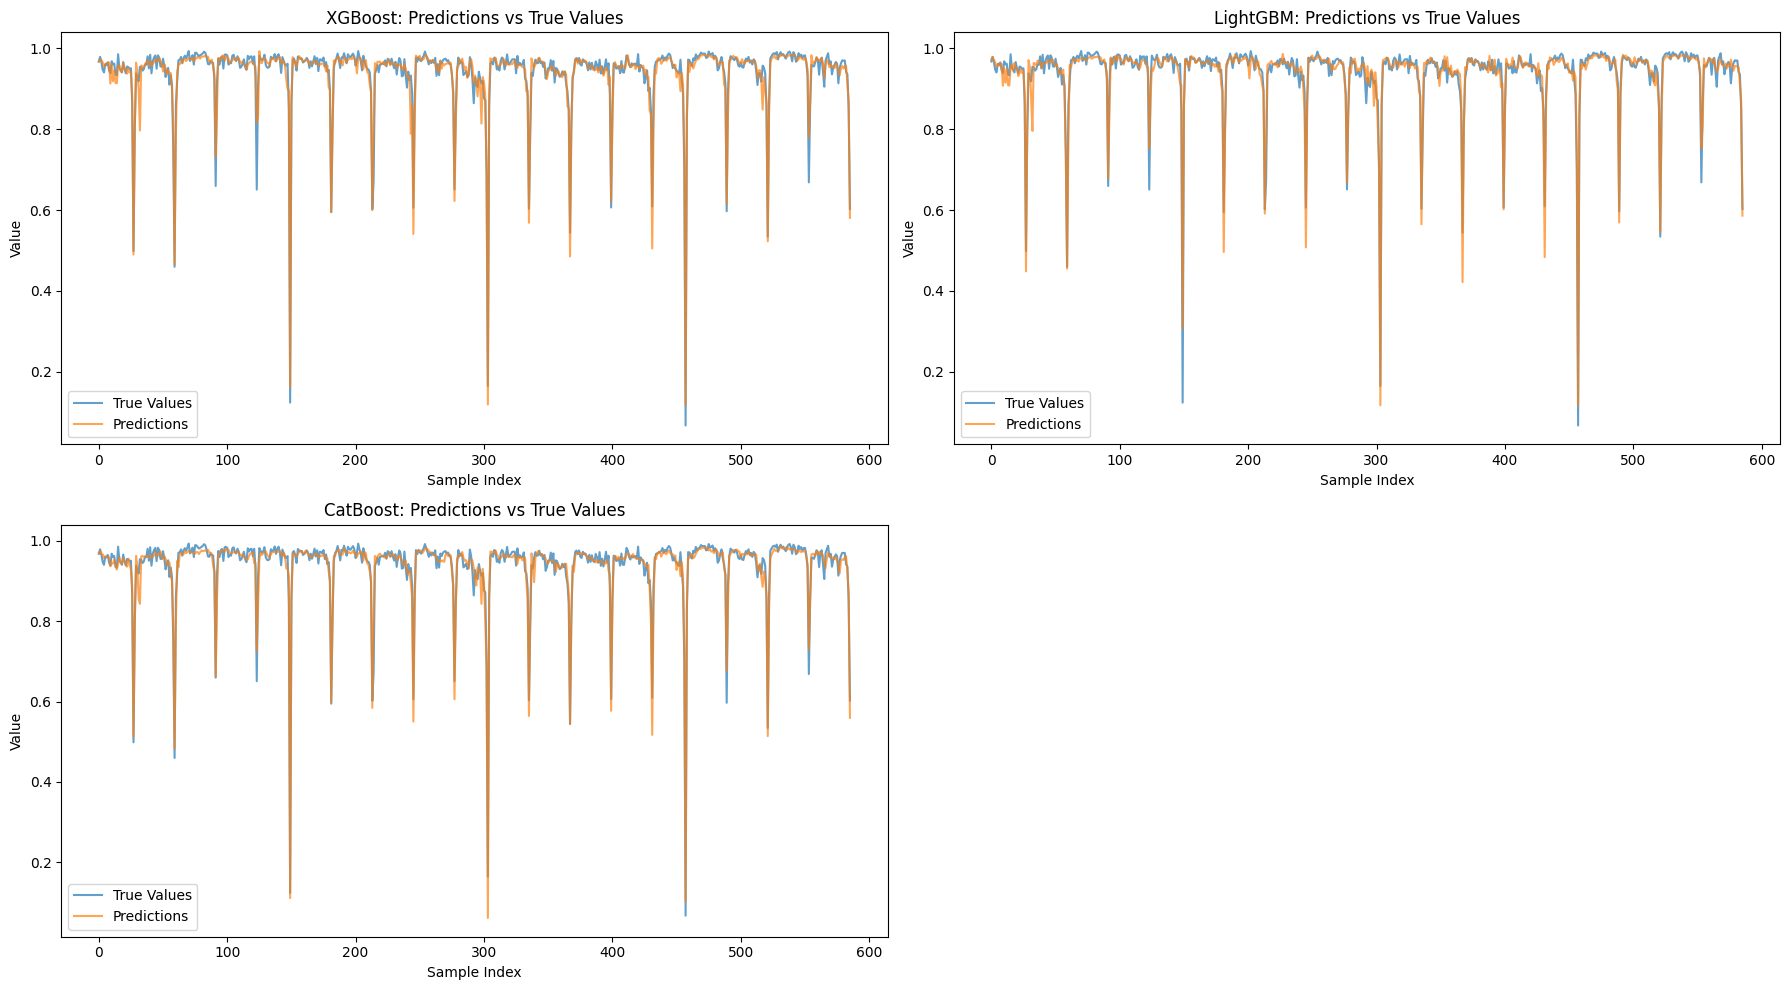

In [5]:
from google.colab import drive
drive.mount('/content/drive')

from tsfresh import extract_features
from tsfresh.utilities.dataframe_functions import make_forecasting_frame, impute
from tsfresh.feature_extraction.settings import MinimalFCParameters
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Step 1: Load the data
data = pd.read_csv('/content/drive/MyDrive/Fintech_Proj/processed_timestamp_data_Prediction.csv')

# Step 2: Feature Engineering for Time Series
def create_lag_features(df, target_col, lags):
    for lag in range(1, lags + 1):
        df[f"{target_col}lag{lag}"] = df[target_col].shift(lag)
    df[f"{target_col}_moving_avg_7"] = df[target_col].rolling(window=7).mean()
    return df

target_column = 'Avg_Order_Executed'  # Replace with your target column
lags = 8  # Number of lag features
data = create_lag_features(data, target_column, lags)

# Drop rows with NaN values created by lagging
data = data.dropna()

# Ensure all columns are numeric before further processing
data = data.apply(pd.to_numeric, errors='coerce')
data = data.dropna()

# Step 3: Generate TSFresh features
# Create forecasting frame
tsfresh_frame, _ = make_forecasting_frame(
    data[target_column], kind="time_series", max_timeshift=lags, rolling_direction=1
)

# Ensure the tsfresh_frame is numeric
tsfresh_frame = tsfresh_frame.apply(pd.to_numeric, errors='coerce')
tsfresh_frame = tsfresh_frame.dropna()

# Extract features
settings = MinimalFCParameters()
ts_features = extract_features(
    tsfresh_frame, column_id="id", column_sort="time", default_fc_parameters=settings, impute_function=impute
)

# Combine TSFresh features with the existing dataset
data = pd.concat([data.reset_index(drop=True), ts_features.reset_index(drop=True)], axis=1)
data = data.dropna()  # Drop NaN values created during TSFresh extraction

# Step 4: Split data into features and target
X = data.drop(columns=[target_column, 'Target_0', 'Target_35', 'Target_65', 'Target_90', 'Year', 'Second'], errors='ignore')  # Drop target and non-predictive columns
y = data[target_column]

# Extract the day and month columns for the test set range only
dates = data[['Day', 'Month']].iloc[-len(y):]  # Keep only the range relevant to the test set

# Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Correctly slice dates to match y_test
dates = dates.iloc[len(X_train):]

# Optional: Scale features
scaler = StandardScaler()

# Ensure X_train and X_test contain numeric values only
X_train = pd.DataFrame(X_train).apply(pd.to_numeric, errors='coerce').dropna()
X_test = pd.DataFrame(X_test).apply(pd.to_numeric, errors='coerce').dropna()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Models to compare
models = {
    "XGBoost": XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42),
    "LightGBM": LGBMRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42),
    "CatBoost": CatBoostRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42, verbose=0)
}

# Train and evaluate each model
plt.figure(figsize=(18, 10))
for i, (name, model) in enumerate(models.items()):
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)

    # Metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"{name} Evaluation Metrics:")
    print(f"  Mean Squared Error (MSE): {mse:.4f}")
    print(f"  Mean Absolute Error (MAE): {mae:.4f}")
    print(f"  R^2 Score: {r2:.4f}")

    # Display prediction results
    results = pd.DataFrame({"True Values": y_test.values, "Predictions": y_pred, "Day": dates["Day"].values, "Month": dates["Month"].values})
    print(results.head())

    # Plot Predictions vs Actual Values
    plt.subplot(2, 2, i + 1)
    plt.plot(range(len(y_test)), y_test.values, label="True Values", alpha=0.7)
    plt.plot(range(len(y_pred)), y_pred, label="Predictions", alpha=0.7)
    plt.title(f'{name}: Predictions vs True Values')
    plt.xlabel('Sample Index')
    plt.ylabel('Value')
    plt.legend()

# Adjust plot layout
plt.tight_layout()
plt.show()


#Arima Model for Forecasting

In [ ]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 31.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
from pmdarima import auto_arima
from sklearn.preprocessing import MinMaxScaler


# Step 1: Load the data
data = pd.read_csv('/content/drive/MyDrive/Fintech_Proj/processed_timestamp_data_Prediction.csv')

# Step 2: Prepare the time series data
# Ensure the data is sorted by time
target_column = 'Avg_Order_Executed'  # Replace with your target column
series = data[target_column]

# Scale the data
scaler = MinMaxScaler()
series_scaled = scaler.fit_transform(series.values.reshape(-1, 1))

# Convert scaled data back to a pandas Series
series = pd.Series(series_scaled.flatten(), index=series.index)

# Step 3: Split data into train and test sets
train_size = int(len(series) * 0.8)
train, test = series[:train_size], series[train_size:]

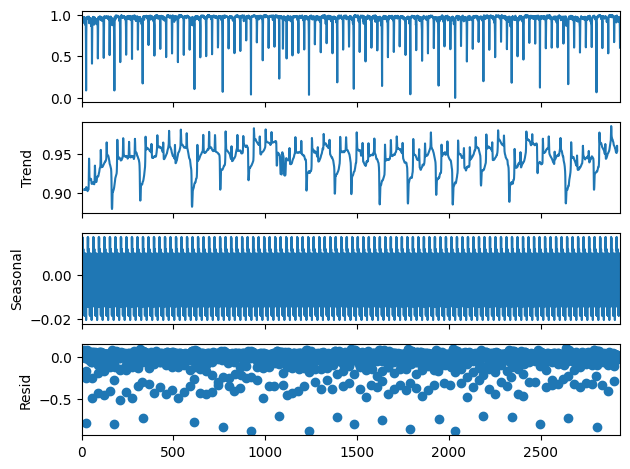

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Decompose the time series
result = seasonal_decompose(series, model='additive', period=30)  # Adjust period based on your data
result.plot()
plt.show()

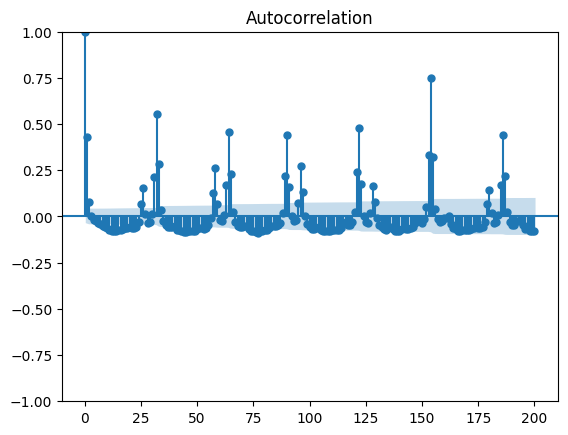

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(series, lags=200)  # Adjust lags to cover a broader range
plt.show()

In [ ]:
import itertools
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define parameter ranges
p = d = q = range(0, 3)  # ARIMA terms
P = D = Q = range(0, 2)  # Seasonal terms
s = 30  # Seasonal period based on ACF peaks

# Generate all combinations of p, d, q and seasonal P, D, Q
pdq = list(itertools.product(p, d, q))
seasonal_pdq = list(itertools.product(P, D, Q, [s]))

# Grid search to find the best parameters based on AIC
best_aic = float("inf")
best_params = None
best_model = None

for param in pdq:
    for seasonal_param in seasonal_pdq:
        try:
            model = SARIMAX(series, order=param, seasonal_order=seasonal_param)
            results = model.fit(disp=False)
            if results.aic < best_aic:
                best_aic = results.aic
                best_params = (param, seasonal_param)
                best_model = results
        except Exception as e:
            continue

print(f"Best SARIMA order: {best_params[0]}, Seasonal order: {best_params[1]}, AIC: {best_aic}")

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood op

In [ ]:
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(series)
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")
if adf_result[1] < 0.05:
    print("The series is stationary.")
else:
    print("The series is not stationary. Differencing is required.")
    series_diff = series.diff().dropna()

ADF Statistic: -14.984889768074753
p-value: 1.147711878184528e-27
The series is stationary.


Mean Squared Error: 0.008363722814939774
Mean Absolute Error: 0.044005382762161795


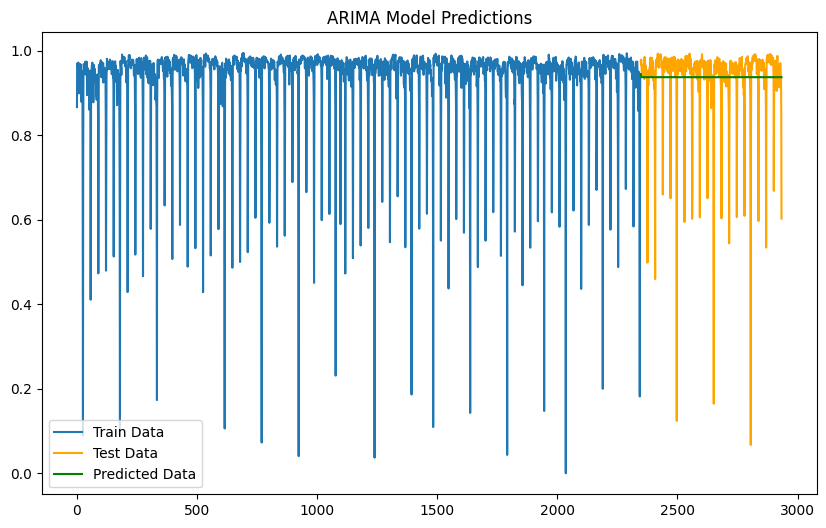

In [ ]:
p, d, q = 1,0,1  # Example values, tune these based on your data
model = ARIMA(train, order=(p, d, q))
fitted_model = model.fit()



# Step 5: Make predictions
forecast = fitted_model.forecast(steps=len(test))

# Step 6: Evaluate the model
mse = mean_squared_error(test, forecast)
mae = mean_absolute_error(test, forecast)
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

# Step 7: Save predictions and true values
results = pd.DataFrame({
    "True Values": test.values,
    "Predicted Values": forecast
})
results.to_csv("arima_prediction_results.csv", index=False)

# Step 8: Plot the results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label="Train Data")
plt.plot(test.index, test, label="Test Data", color="orange")
plt.plot(test.index, forecast, label="Predicted Data", color="green")
plt.legend()
plt.title("ARIMA Model Predictions")
plt.show()

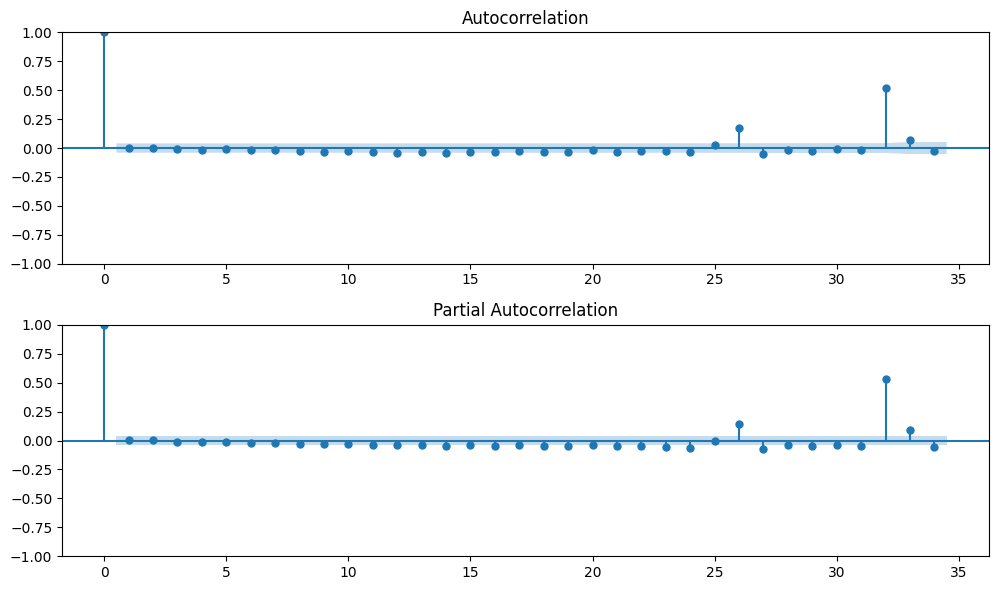

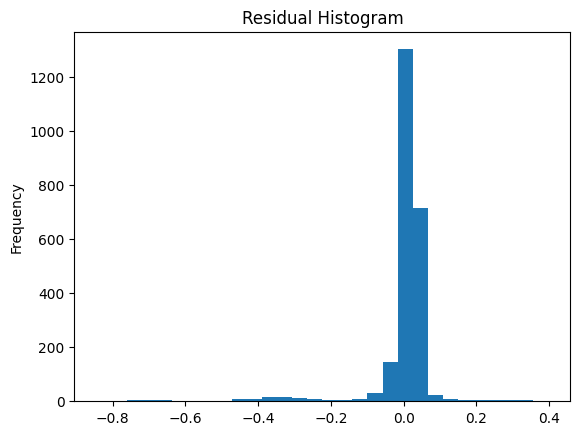

In [ ]:
residuals = fitted_model.resid
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.subplot(211)
plot_acf(residuals, ax=plt.gca())
plt.subplot(212)
plot_pacf(residuals, ax=plt.gca())
plt.tight_layout()
plt.show()

# Plot residual histogram
residuals.plot(kind='hist', bins=30, title='Residual Histogram')
plt.show()